
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [80]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

120


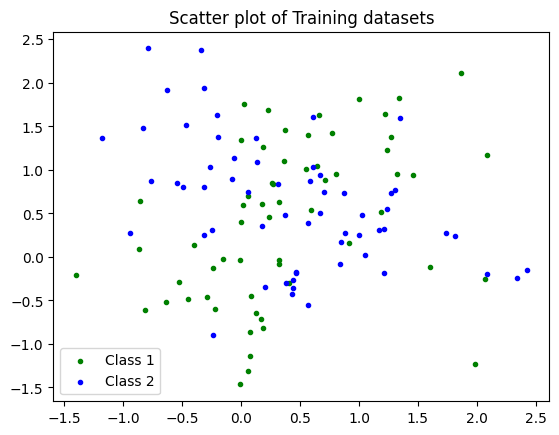

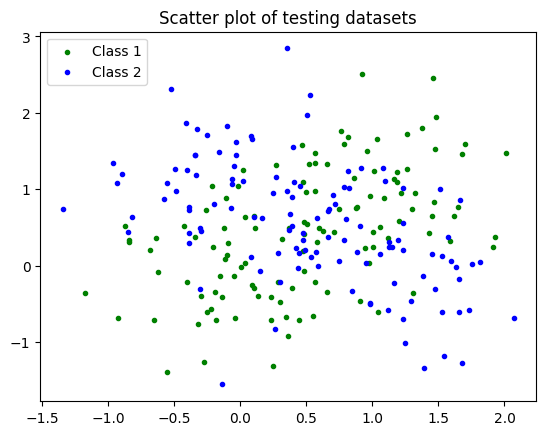

In [95]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
#Assuming the covariance to be 0.3
mean1=[0,0]
mean2=[0,1]
mean3=[1,0]
mean4=[1,1]
cov=[[0.3,0],[0,0.3]]

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution

#Generate 90 points from each of the Gaussian Distribution and assign training points and testing points
dis1=np.random.multivariate_normal(mean1,cov,90)
dis2=np.random.multivariate_normal(mean2,cov,90)
dis3=np.random.multivariate_normal(mean3,cov,90)
dis4=np.random.multivariate_normal(mean4,cov,90)

type(dis1)

#Assign 30 points from each Gaussian to training set
trainx=list(dis1[0:30])+list(dis4[0:30])+list(dis2[0:30])+list(dis3[0:30])
for i in range(0,len(trainx)):
  trainx[i]=list(trainx[i])
trainy=[1]*60+[-1]*60

#Assign 60 points from each Gaussian to testing set
testx=list(dis1[30:])+list(dis4[30:])+list(dis2[30:])+list(dis3[30:])
for i in range(0,len(testx)):
  testx[i]=list(testx[i])
testy=[1]*120+[-1]*120

#Visualize the data using plt.scatter() function
print(len(trainx))

trainxx=[]
for t in trainx:
  trainxx.append(t[0])
trainxy=[]
for t in trainx:
  trainxy.append(t[1])

testxx=[]
for t in testx:
  testxx.append(t[0])
testxy=[]
for t in testx:
  testxy.append(t[1])

#Plotting all the data-points in a Scatter Plot
plt.scatter(trainxx[:60],trainxy[:60],color="green",marker='.',label="Class 1")
plt.scatter(trainxx[60:],trainxy[60:],color="blue",marker='.',label="Class 2")
plt.legend()
plt.title("Scatter plot of Training datasets")
plt.show()

plt.scatter(testxx[:120],testxy[:120],color="green",marker='.',label="Class 1")
plt.scatter(testxx[120:],testxy[120:],color="blue",marker='.',label="Class 2")
plt.legend()
plt.title("Scatter plot of testing datasets")
plt.show()


In the part(a), we just plotted all the datapoints which were randomly generated from the gaussian distribution along with their correct class labels.

62.916666666666664


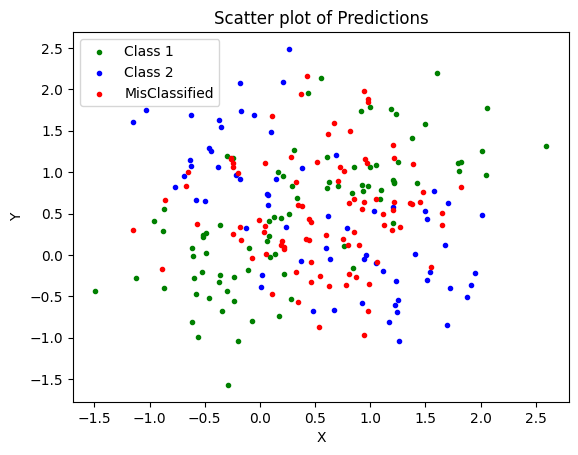

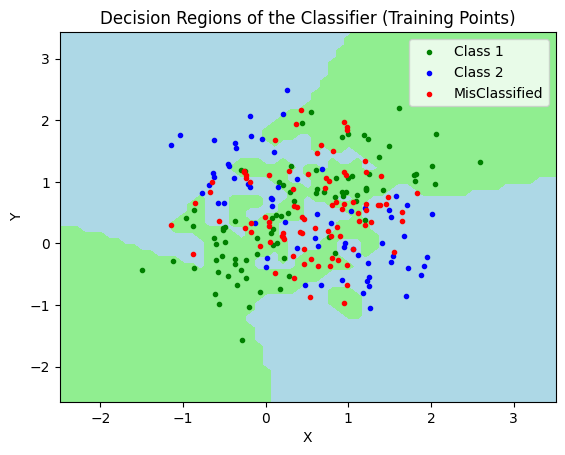

In [82]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function

def dist(la,lb):
  '''
  #Inputs : Data points la and lb
  #Outputs : square of the Euclidean distance between the points
  '''
  return (la[0]-lb[0])**2+(la[1]-lb[1])**2



def kNNClassify(X_train,Y_train,X_test,k):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code
  answer=[]
  o=0
  for b in X_test:
    d_list=[]
    for i in range(0,len(X_train)):
      d_list.append([dist(X_train[i],b),Y_train[i]])
    d_list=sorted(d_list)
    count1=0
    for i in range(0,k):
      if(d_list[i][1]==1):
        count1+=1;
    if(count1*2>=k):
      answer.append(1);
    else:
      answer.append(-1);
  return answer

pre=kNNClassify(trainx,trainy,testx,1)


#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code
  count=0
  for i in range(0,len(true)):
    if(true[i]==pred[i]):
      count=count+1
  return (count/len(true))*100.0

print(KNNAccuracy(testy,pre))





#The below code is used to print the scatter plot of the predictions made by the KNN classifier using their predicted classes
#Create a visual representation of predictions
bluex=[]
bluey=[]
redx=[]
redy=[]
greenx=[]
greeny=[]
for i in range(0,len(pre)):
  if(testy[i]==pre[i]):
    if(pre[i]==1):
      d="green"
      l="Class 1"
    else:
      d="blue"
      l="Class 2"
  else:
    d="red"
    l="MisClassified";
  if(l=="Class 1"):
    greenx.append(testx[i][0])
    greeny.append(testx[i][1])
  if(l=="Class 2"):
    bluex.append(testx[i][0])
    bluey.append(testx[i][1])
  if(l=="MisClassified"):
    redx.append(testx[i][0])
    redy.append(testx[i][1])
  # plt.scatter(testx[i][0],testx[i][1],color=d,label=l,marker='.')
plt.scatter(greenx,greeny,color="green",label="Class 1",marker=".")
plt.scatter(bluex,bluey,color="blue",label="Class 2",marker=".")
plt.scatter(redx,redy,color="red",label="MisClassified",marker=".")
plt.title("Scatter plot of Predictions")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


#The below code is used to plot the decision regions along with the predictions made by the KNN Classifier on the test data
min1,min2=min(testxx),min(testxy)
max1,max2=max(testxx),max(testxy)
# define the x and y scale
x1grid = np.arange(min1-1, max1+1, 0.1)
x2grid = np.arange(min2-1, max2+1, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
ygrid=np.array(kNNClassify(trainx,trainy,grid,1))

zz = ygrid.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap=ListedColormap(['#ADD8E6', '#90EE90']))

# plt.scatter(trainxx[:60],trainxy[:60],color="green",label="class 1",marker='.')
# plt.scatter(trainxx[60:],trainxy[60:],color="blue",label="class 2",marker='.')
# plt.scatter(testxx[:60],testxy[:60],color="green",label="class 1")
# plt.scatter(testxx[60:],testxy[60:],color="blue",label="class 2")
# # show the plot
plt.scatter(greenx,greeny,color="green",label="Class 1",marker=".")
plt.scatter(bluex,bluey,color="blue",label="Class 2",marker=".")
plt.scatter(redx,redy,color="red",label="MisClassified",marker=".")
plt.title("Decision Regions of the Classifier (Training Points)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

#Generate and visualize the decision regions and overlay the test points






[39.72972972972972, 38.108108108108105, 39.189189189189186, 41.89189189189189, 44.86486486486486, 43.24324324324324, 40.27027027027026, 41.08108108108108, 39.189189189189186, 40.54054054054054, 37.83783783783783]
[0.0, 18.928571428571416, 24.047619047619037, 27.38095238095238, 29.52380952380952, 28.214285714285722, 29.76190476190476, 29.52380952380952, 30.833333333333343, 31.071428571428584, 32.26190476190477]


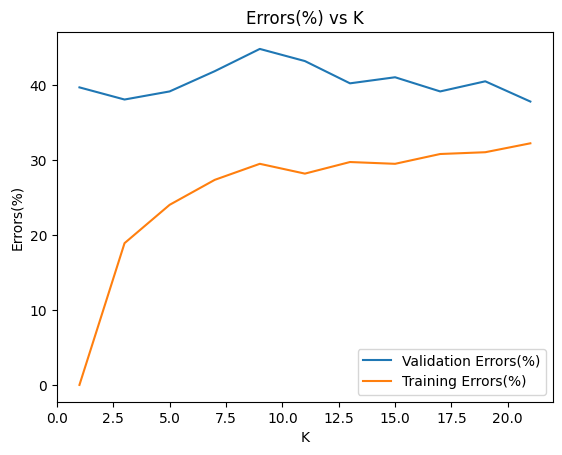

The optimal value of K is 21
The best accuracy that we are getting with optimal k is: 69.58333333333333


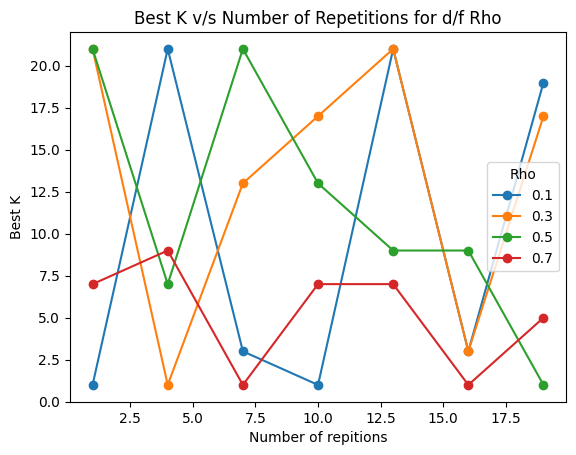

In [83]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho):
  '''
  #Inputs : Arrays of values of K, No. of Repetitions to be performed, Fraction of Data to be used as Testing data
  #Outputs : Return the Validation errors as well as Training errors for all the values of K as two Lists
  '''
  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.
  rho=rho
  n=numrep
  validationacc=[]
  trainingacc=[]
  for i in k_range:
    tempacc=[]
    tempacc2=[]
    for j in range(0,n):
      l=trainx
      ly=trainy
      temp = list(zip(l,ly))
      random.shuffle(temp)
      res1, res2 = zip(*temp)
      l,ly = list(res1), list(res2)
      testl=l[0:int(rho*len(trainx))+1]
      testlz=ly[0:int(rho*len(trainx))+1]
      trainl=l[int(rho*len(trainx)):]
      trainlz=ly[int(rho*len(trainx)):]
      testlpre=kNNClassify(trainl,trainlz,testl,i)
      trainlpre=kNNClassify(trainl,trainlz,trainl,i)
      tempacc.append(KNNAccuracy(testlz,testlpre))
      tempacc2.append(KNNAccuracy(trainlz,trainlpre))
    validationacc.append(100-sum(tempacc)/len(tempacc))
    trainingacc.append(100-sum(tempacc2)/len(tempacc2))
  return validationacc,trainingacc

#Printing the Validation as well as Training errors for K Values 1,3,5,..... and 10 Repetitions with Rho=0.3
k_range=np.arange(1,23,2)
verr,terr=holdoutCVkNN(k_range,10,0.3)
print(verr)
print(terr)


#Plot training and validation errors for different values of k

plt.plot(k_range,verr,label="Validation Errors(%)")
plt.plot(k_range,terr,label="Training Errors(%)")
plt.title("Errors(%) vs K")
plt.xlabel("K")
plt.ylabel("Errors(%)")
plt.legend()
plt.show()
bestk=k_range[verr.index(np.min(verr))]

#what is the best value for k?
#Choosing the value for k which yields minimal validation errors for the given Dataset


#Effect of rho and number repetations on k

k_range = np.arange(1, 23, 2)
numarr = np.arange(1, 21, 3)
rhoarr = np.arange(0.1, 0.9, 0.2)
ansarr = []

for rho in rhoarr:
    numeff = []
    for numrep in numarr:
        verr, terr = holdoutCVkNN(k_range, numrep, rho)
        min_err = np.min(verr)
        min_idx = verr.index(min_err)
        numeff.append(k_range[min_idx])
    ansarr.append(numeff)
#Plotting the best value of K obtained for each rho
j=0
for i in ansarr:
  plt.plot(numarr,i,marker='o',label=int(rhoarr[j]*10)/10)
  j=j+1
plt.legend(title="Rho")
plt.title("Best K v/s Number of Repetitions for d/f Rho")
plt.xlabel("Number of repitions")
plt.ylabel("Best K")


#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
#Printing the Optimal value of K and the accuracy associated with it
besty=kNNClassify(trainx,trainy,testx,bestk)
bestacc=KNNAccuracy(testy,besty)
print("The optimal value of K is "+str(bestk))
print("The best accuracy that we are getting with optimal k is: "+str(bestacc))



Q: How would you answer what is the best value of K? <br>
A: The value of K which gives minimum validation and training errors should be ideally chosen. However in the Real World Scenarios, As K increases, Training errors generally increase and Validation errors decrease. Therefore we can find a value of K which takes into account both these factors which is usually done by considering the minimum value of the weighted average of Validation and training Accuracy.<br> Here in our case More emphasis is being given to minimise the validation Errors.<br>
Q: How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?<br>
A: When we increase rho, we decrease the training data set size and increase the validation data set size. The variation of k with Rho for different number of repititions is shown in the above graph.
As the number of repetitions increase, we reach a stable value of Best K for each Rho. As Rho increases there is a slight decrease in the Best K as we approach a stable value<br>
Q: Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part 2.<br>
A: The classification error decreases as we chose the optimal value of K based on the validation dataset. The New improved accuracy is printed in the above Output.


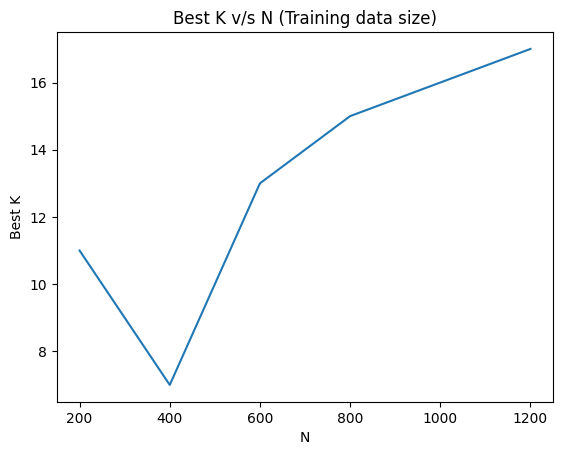

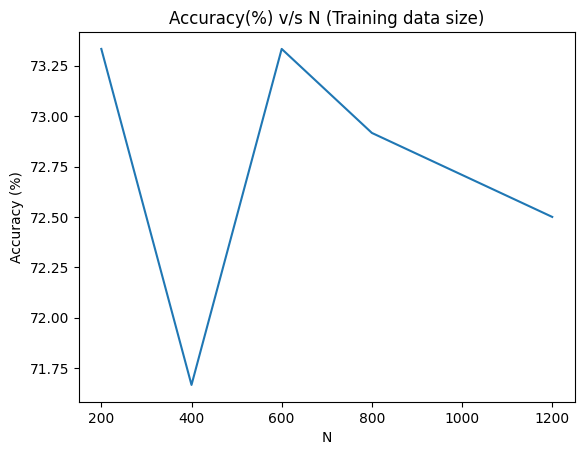

The accuracy that we get after increasing the co-variance to 0.6: : 53.0
The accuracy that we get after increasing the co-variance to 0.7: : 54.50000000000001
The accuracy that we get after increasing the co-variance to 0.8: : 52.5


In [85]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
#Obtaining more datapoints from the Gaussian Distribution to improve the accuracy of the KNN classifier
mean1=[0,0]
mean2=[0,1]
mean3=[1,0]
mean4=[1,1]
cov=[[0.3,0],[0,0.3]]
n_list=[200,400,600,800,1200] #Different values of the training data set size used
bestks=[]
newtrainx=[]
newtrainy=[]
for n in n_list:
  dis1=np.random.multivariate_normal(mean1,cov,int(n/4))
  dis2=np.random.multivariate_normal(mean2,cov,int(n/4))
  dis3=np.random.multivariate_normal(mean3,cov,int(n/4))
  dis4=np.random.multivariate_normal(mean4,cov,int(n/4))
  newtrainx=list(dis4)+list(dis1)+list(dis2)+list(dis3)
  for i in range(0,len(newtrainx)):
    newtrainx[i]=list(newtrainx[i])
  newtrainy=[1]*int(n/2)+[-1]*int(n/2)
  bestacc=-1
  bestk=-1
  for kl in k_range:
    predicted_y=kNNClassify(newtrainx,newtrainy,testx,kl)
    acc=KNNAccuracy(testy,predicted_y)
    if acc>bestacc:
      bestacc=acc
      bestk=kl
  bestks.append([bestacc,bestk])  #Finding the suitable value of k for each size of the training data and finding the corresponding accuracy
  # print(bestacc)

#Plotting the Best value of K for each training data size used
plt.plot(n_list,[x[1] for x in bestks])
plt.title("Best K v/s N (Training data size)")
plt.xlabel("N")
plt.ylabel("Best K")
plt.show()

#Plotting the Accuracy vs training data size
plt.plot(n_list,[x[0] for x in bestks])
plt.title("Accuracy(%) v/s N (Training data size)")
plt.xlabel("N")
plt.ylabel("Accuracy (%)")
plt.show()


#Experiments with more difficult data set.
#This was done by bringing the datasets closer by increasing the covariance and varying it
#The accuracy corresponding to each variance is being printed as the output

for i in range(0,3):
  cov=[[0.6+0.1*i,0],[0,0.6+0.1*i]]
  n=200
  dis1=np.random.multivariate_normal(mean1,cov,int(n/4))
  dis2=np.random.multivariate_normal(mean2,cov,int(n/4))
  dis3=np.random.multivariate_normal(mean3,cov,int(n/4))
  dis4=np.random.multivariate_normal(mean4,cov,int(n/4))
  newtrainx=list(dis4)+list(dis1)+list(dis2)+list(dis3)
  newtrainy=[1]*int(n/2)+[-1]*int(n/2)
  dis1=np.random.multivariate_normal(mean1,cov,int(n/4))
  dis2=np.random.multivariate_normal(mean2,cov,int(n/4))
  dis3=np.random.multivariate_normal(mean3,cov,int(n/4))
  dis4=np.random.multivariate_normal(mean4,cov,int(n/4))
  newtestx=list(dis4)+list(dis1)+list(dis2)+list(dis3)
  newtesty=[1]*int(n/2)+[-1]*int(n/2)
  predicted_y=kNNClassify(newtrainx,newtrainy,newtestx,3)
  acc=KNNAccuracy(newtesty,predicted_y)
  print(f"The accuracy that we get after increasing the co-variance to {str(0.6+0.1*i)}: : {str(acc)}")


#The accuracy decreases as we increase the covariance



Q: Evaluate the performance as the size of the training set grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.<br>
A: As N(training set) grows, generally the accuracy of the kNN Classifier model increases as there is more data available for the model to compare the new test point and assign it a label and make better predictions. <br>A good range of k can be chosen by the thorough analysis of the errors that we get while predicting the labels of the Validation dataset. The Values of K which give minimal validation errors are considered to be optimal. We can run the tests multiple times to get a stable solution.No proper relation can be derived between n and best_k from the above graph. However it might be possible to get a relation if we compute for larger values of n.

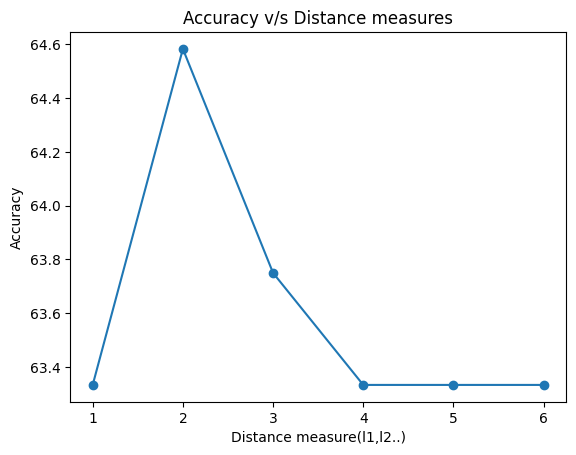

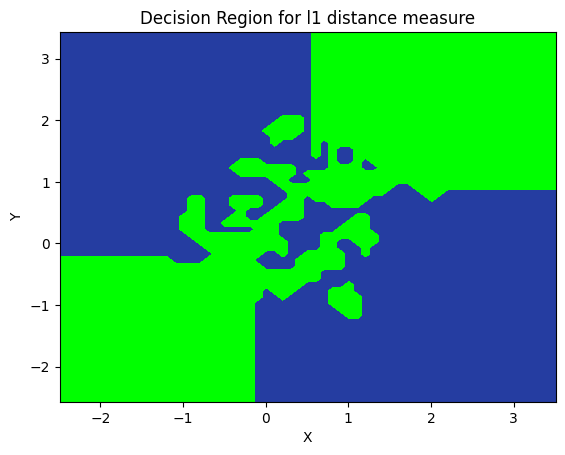

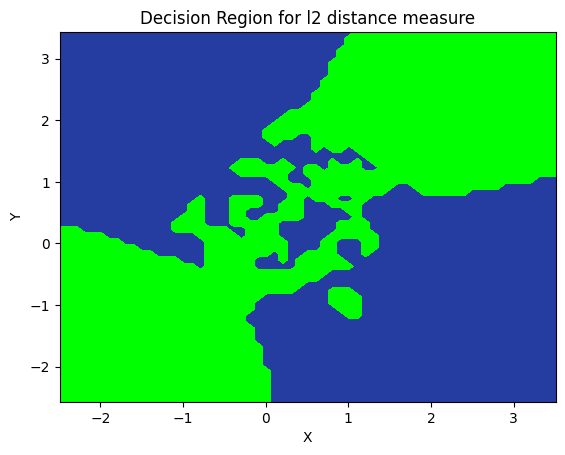

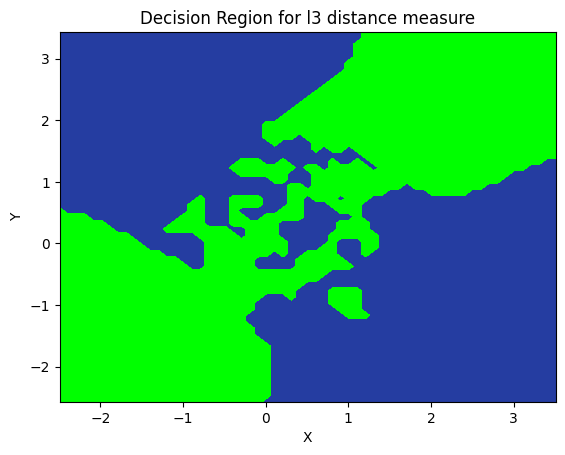

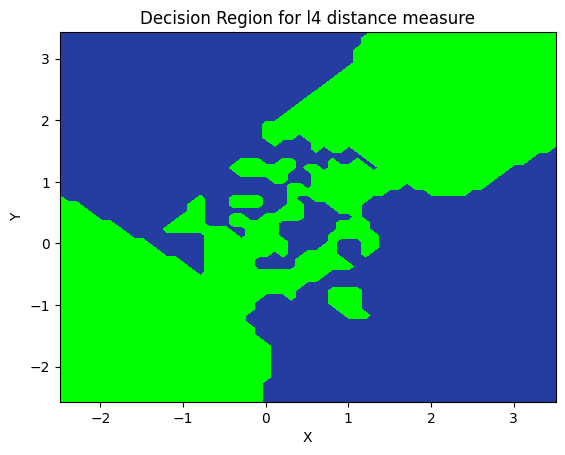

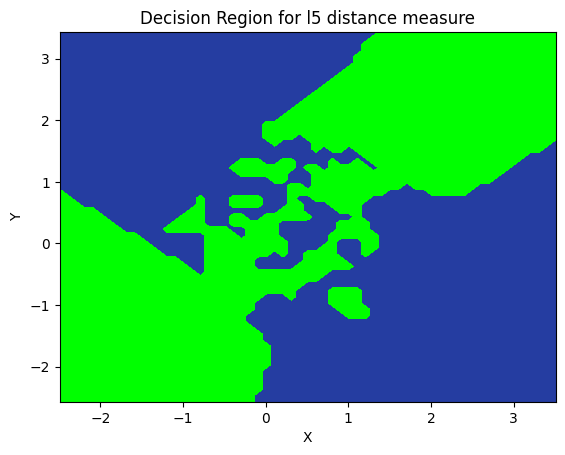

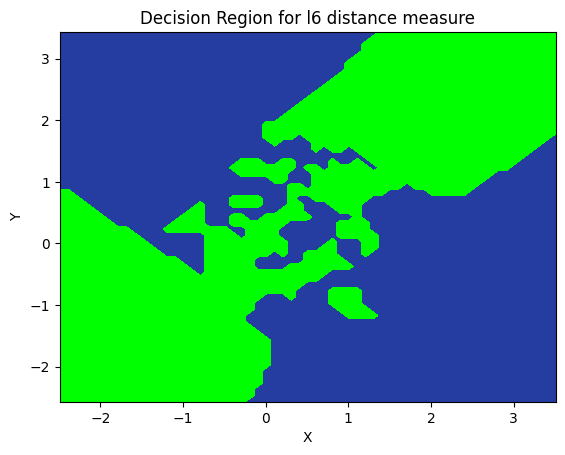

In [91]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
def distl(la,lb,l):
  '''
  #Inputs : Data points la and lb and a distance metric parameter(l1,l2,..)
  #Outputs : square of the appropriate distance measure
  '''
  return (abs(la[0]-lb[0]))**l+(abs(la[1]-lb[1]))**l


def kNNClassify_l(X_train,Y_train,X_test,k,l):
  '''
  #Inputs : Training data sets with their actual labels,Testing data whose labels need to be predicted, Parameter K in kNN, Distance metric to be used for classification
  #Outputs : Predicted Labels for the training data
  '''
  answer=[]
  o=0
  for b in X_test:
    d_list=[]
    for i in range(0,len(X_train)):
      d_list.append([distl(X_train[i],b,l),Y_train[i]])
    d_list=sorted(d_list)
    count1=0
    for i in range(0,k):
      if(d_list[i][1]==1):
        count1+=1;
    if(count1*2>=k):
      answer.append(1);
    else:
      answer.append(-1);
  return answer

#Plotting the accuracy vs different Distance metrics
temp=[]
templ=[1,2,3,4,5,6]
for i in templ:
  pre=kNNClassify_l(trainx,trainy,testx,3,i)
  temp.append(KNNAccuracy(testy,pre))
plt.plot(templ,temp,marker='o')
plt.xlabel("Distance measure(l1,l2..)")
plt.ylabel("Accuracy")
plt.title("Accuracy v/s Distance measures")
plt.show()

#Plotting the decision regions for each distance metric l1,l2,l3,....
min1,min2=min(testxx),min(testxy)
max1,max2=max(testxx),max(testxy)
# define the x and y scale
x1grid = np.arange(min1-1, max1+1, 0.1)
x2grid = np.arange(min2-1, max2+1, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))

for l in templ:
  ygrid=np.array(kNNClassify_l(trainx,trainy,grid,1,l))
  plt.scatter(trainxx[:60],trainxy[:60],color="green",label="class 1",marker='.')
  plt.scatter(trainxx[60:],trainxy[60:],color="blue",label="class 2",marker='.')
  zz = ygrid.reshape(xx.shape)
  plt.contourf(xx, yy, zz, cmap=ListedColormap(['#253DA1', '#00ff00']))
  plt.title(f"Decision Region for l{l} distance measure")
  plt.xlabel("X")
  plt.ylabel("Y")
  plt.show()

#Understand the decision regions of KNN classifier with different distance measures







Observations:<br>
The decision regions of the KNN Classifier change when we change the distance measures(l1,l2,..). For example, l1 distance tends to produce more linear decision boundaries, while l2 distance typically results in smoother, more curved boundaries which are generally represented by quadratic lines and so on. Generally larger distance metrics are more sensitive to the scale that we use in representing the data points in the kNN model.<br>
Accuracies obtained by varying the values of distance metrics are plotted in the above graph<br>
The decision regions are plotted for different values of the distance metrics<br>

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


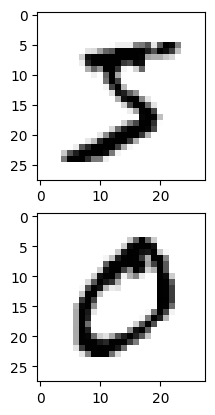

In [93]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow((images[1].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
#The remaining (f) part is coded in the next cell

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 18.0, 18.0, 18.0, 126.0, 136.0, 175.0, 26.0, 166.0, 255.0, 247.0, 127.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.0, 36.0, 94.0, 154.0, 170.0, 253.0, 253.0, 253.0, 253.0, 253.0, 225.0, 172.0, 253.0, 242.0, 195.0,

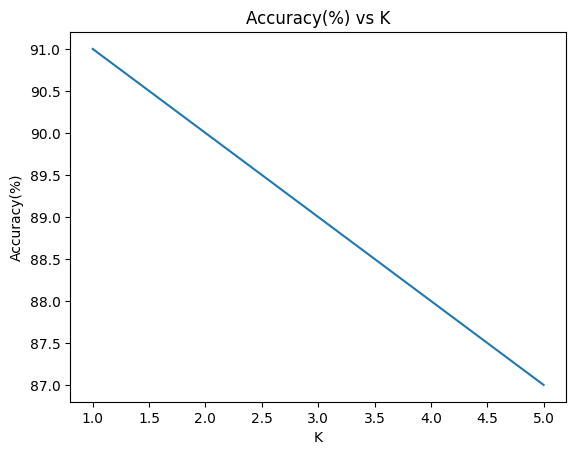

The Optimal value of K is: 1


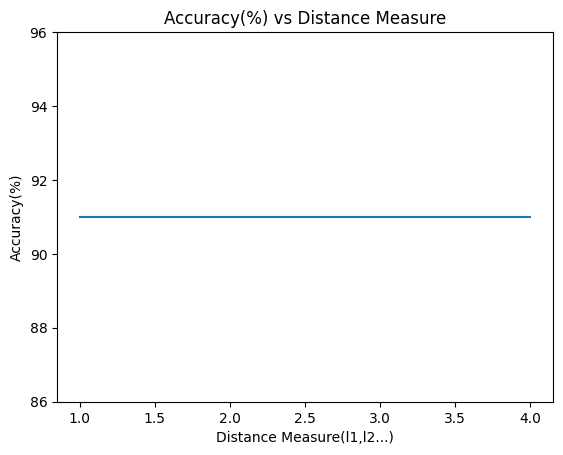

The Optimal value of distance measure: 4
Optimal Accuracy with best hyper parameters ( k, error_func ) obtained from cross validation: 88.0
The confusion matrix for the given testing data is: 
 [[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  4.  0.  0.  1.  0.  0.  1.  0.]
 [ 0.  0.  0.  6.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  8.  0.  0.  0.  0.  2.]
 [ 0.  0.  0.  0.  0.  9.  1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0. 12.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0. 17.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  6.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  1.  6.]]


In [94]:

#Create train, validation and test splits

images=list(images[:1000])
targets=list(targets[:1000])
""""
The code here is being run by using 1000 images as the input and not 70000.... As My PC is taking too long for the Output to be produced..
It can be changed according to the requirements by replacing 1000 by 70000

"""

#Converting all the images into lists each containg pixel values
images=list(images)
targets=list(targets)
for i in range(0,len(images)):
  images[i]=list(images[i])
for i in range(0,len(targets)):
  targets[i]=int(targets[i])
print(images[0],targets[0])

#Splitting the data into training and validation sets and testing data sets in 8:1:1 ratio
trainimg=images[:int(0.8*len(images))]
trainimgy=targets[:int(0.8*len(images))]
valimg=images[int(0.8*len(images)):int(0.9*len(images))]
valimgy=targets[int(0.8*len(images)):int(0.9*len(images))]
testimg=images[int(0.9*len(images)):]
testimgy=targets[int(0.9*len(images)):]
print(len(trainimg),len(valimg),len(testimg))

#Write 'MultiClassKNNClassify' function
def rootmean_sqerr(pre,true):
  """
  Returns the root mean squared error caused by the difference in the predicted values and the actual class values
  """
  sum=0
  for i in range(0,len(pre)):
    sum+=(pre[i]-true[i])**2
  return np.sqrt(sum/len(pre))



def MultiClassdist(a,b,l):
  """
  Input: Data points a,b
  Output: Returns the square of the distance metric l
  """
  sum=0
  for i in range(0,len(a)):
    sum+=(abs(a[i]-b[i])**l)
  return sum
def MultiClassKNNClassify(X_train,Y_train,X_test,k,l):
  """
  Input: Training data and class values and Testing data,Parameters k and distance metric l
  Output: Returns the class labels for all the testing data
  """
  answer=[]
  o=0
  for b in X_test:
    d_list=[]
    for i in range(0,len(X_train)):
      d_list.append([MultiClassdist(X_train[i],b,l),Y_train[i]])
    d_list=sorted(d_list)
    map=[0,0,0,0,0,0,0,0,0,0]
    for i in range(0,k):
      map[d_list[i][1]]+=1
    answer.append(map.index(max(map)))
  return answer

def MultiClassKNNAccuracy(true,pred):
  """
  Returns the accuracy of the values predicted by the MultiClassKNNClassifier
  """
  count=0
  for i in range(0,len(true)):
    if(true[i]==pred[i]):
      count=count+1
  return (count/len(true))*100.0

pre=MultiClassKNNClassify(trainimg,trainimgy,testimg,3,2)
print(MultiClassKNNAccuracy(pre,testimgy))

#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.

#Plotting the Accuracy obtained for different values of K
k_accuracy=[]
k_range=list(np.arange(1,7,2))
for k in k_range:
  pre=MultiClassKNNClassify(trainimg,trainimgy,valimg,k,2)
  h=MultiClassKNNAccuracy(pre,valimgy)
  k_accuracy.append([h,k])
plt.plot([item[1] for item in k_accuracy],[item[0] for item in k_accuracy])
plt.title("Accuracy(%) vs K")
plt.ylabel("Accuracy(%)")
plt.xlabel("K")
plt.show()
k_accuracy=sorted(k_accuracy)

#Finding and printing the optimal values of K and l for maximum accuracy
optimal_k=k_accuracy[-1][1]
print(f"The Optimal value of K is: {optimal_k}")

l_range=[1,2,3,4]
l_accuracy=[]
for l in l_range:
  pre=MultiClassKNNClassify(trainimg,trainimgy,valimg,optimal_k,l)
  h=MultiClassKNNAccuracy(pre,valimgy)
  l_accuracy.append([h,l])
plt.plot([item[1] for item in l_accuracy],[item[0] for item in l_accuracy])
plt.title("Accuracy(%) vs Distance Measure")
plt.ylabel("Accuracy(%)")
plt.xlabel("Distance Measure(l1,l2...)")
plt.show()
l_accuracy=sorted(l_accuracy)

optimal_l=l_accuracy[-1][1]
print(f"The Optimal value of distance measure: {optimal_l}")



#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation

pre=MultiClassKNNClassify(trainimg,trainimgy,testimg,optimal_k,optimal_l)
optimal_acc=MultiClassKNNAccuracy(pre,testimgy)
print(f"Optimal Accuracy with best hyper parameters ( k, error_func ) obtained from cross validation: {optimal_acc}")

#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    x = np.zeros((10, 10))
    for i in range(0,len(true)):
      x[true[i]][pred[i]]+=1
    return x

print("The confusion matrix for the given testing data is: \n",compute_confusion_matrix(testimgy, pre))


#Suggest an alternative ways to improve performance


Alternate ways to improve performance:<br>
<ol>
<li>Scaling the number of pixels in each image: The number of pixels of the image can be increased from 28x28 to larger values so as that the model gets better at making predictions about the testing data. However this might be a computationally expensive task.</li>
<li>Dimensionality Reduction: Various methods like Principal component Analysis (PCA) can be used to remove the less-useful information from the images.</li>
<li>Increase the training data size so that the Model can predict more accurately, whinch in this case is the number of images.</li>
<li>Assign different weights to each pixel that is being represented according the level of their priority.</li>
<li>Explore more Ml algorithms which can perform the classification task more efficiently. As its expensive to get labelled data all the times, Use Semi Supervised learning to train the model with more data.</li>
<li>Try to combine the results from the other models by using methods of Transfer-Learning.</li>

<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

Observations:-<br>
The best accuracy that was obtained on the synthetic test data generated was 71%.<br>
The vest accuracy on MNSIT Validation and Test data is close to 91%.
<br>
The confusion matrix tells us that the most incorrectly classified digits are 6 and 8 which can be get to known by considering the off diagonal elements of the confusion matrix<br>
The diagonal elements represent the correctly classified digits (most frequently) by the KNN Classifier